#  House Price Prediction using Machine Learning

##  Project Objective
The goal of this project is to build a predictive model that accurately estimates the sale price of houses based on their features. This can help:

-  Real estate agents price homes competitively
-  Investors identify undervalued properties
-  Banks assess property value for mortgage loans


---


### Step 1: **Data Loading** - We begin by importing the dataset and performing a quick glance to understand its structure.


In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor , AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# importing Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing Logging Libraries
import logging
logging.basicConfig(level=logging.INFO, 
                    format="[%(asctime)s]: %(levelname)s: %(message)s",
                    filename="app.log",
                    filemode="a")




In [2]:
# Importing the dataset

Train = 'https://raw.githubusercontent.com/anirudhajohare19/House_Prices_Prediction_MLModel/refs/heads/main/research/train.csv'

df = pd.read_csv(Train)

df.sample(frac=1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1343,1344,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,177000
77,78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,127000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
1208,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1187,190,RL,107.0,10615,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,95000
261,262,60,RL,69.0,9588,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,276000
337,338,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,214000
91,92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600


## Step 2 : EDA

In [3]:
print(df.shape)

(1460, 81)


### 1. The Train Dataset has 1460 rows and 81 columns.
### 2. The Test Dataset has 1459 rows and 80 columns.
### 3. the combning both datasets we get 2919 rows and 81 columns.

In [4]:
# checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

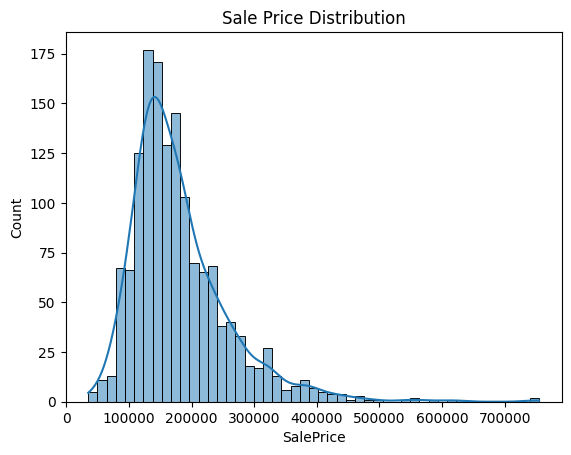

In [5]:
# Target column distribution
sns.histplot(df["SalePrice"], kde=True)
plt.title("Sale Price Distribution")
plt.show()

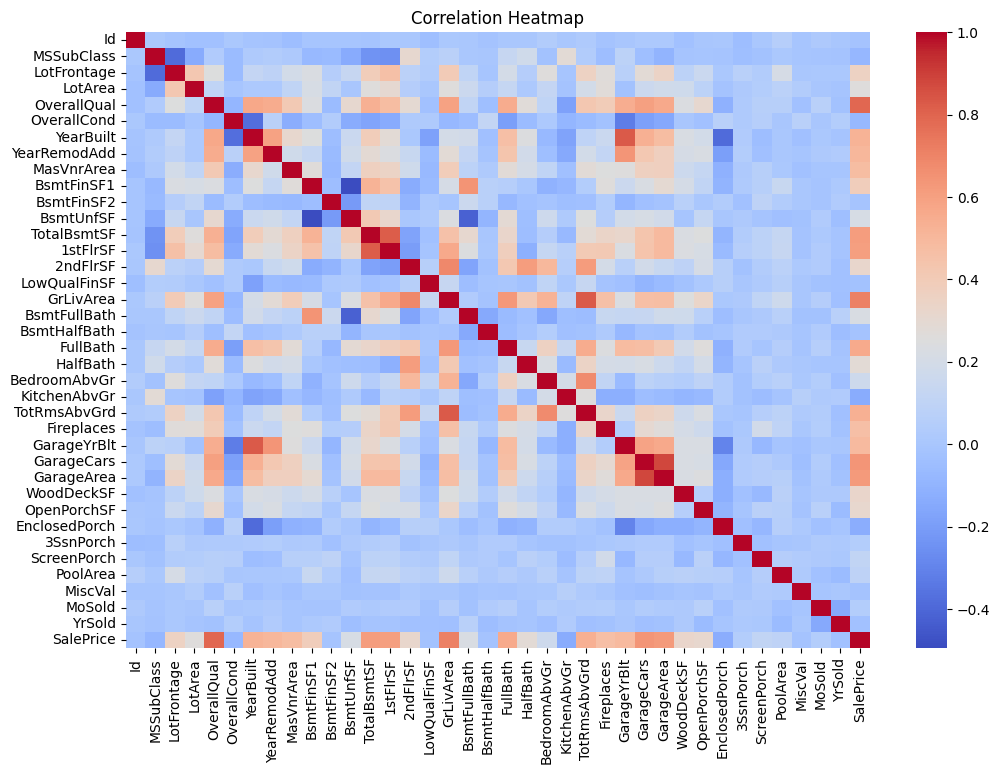

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:

# Check missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

### Missing Values - Analyze missing data. Some columns have null values that might need to be filled or dropped depending on their importance and proportion.


## Step 3 : feature engineering

In [8]:
# droping the columns with missing values
# Dropped from trianing and testing dataset
df.drop(['Id','PoolQC',"Alley", "Fence",'MiscFeature'], axis=1, inplace=True)

### 1. Dropping "PoolQC" and "MiscFeature" Features because they have more than 80% of missing values

In [9]:
# Fillinf the missing values with "None" 

none_cols = ['FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']

for col in none_cols:
    df[col] = df[col].fillna("None")



Categorical features with "NA means None".

Examples: 'GarageType', 'Masvnrtype','GarageCond', 'FireplaceQu'


These are not true missing values—they mean the house doesn't have that feature.

In [10]:
# Fill numeric columns with zero (indicating absence)
# Training datset imputaition
zero_fill_cols = ['GarageYrBlt', 'MasVnrArea']
for col in zero_fill_cols:
    df[col] = df[col].fillna(0)

### Numeric features where missing = 0 (feature doesn’t exist)

### Examples:

### GarageYrBlt (no garage)

### MasVnrArea (no masonry veneer)

In [11]:
# Impute with median for numeric features where missin
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())



###  Feature Relationships
Neighborhood and Overall Quality are strong predictors of price. Higher quality or location means higher prices 


In [12]:
# New features
'''
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
'''


"\ndf['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']\ndf['Age'] = df['YrSold'] - df['YearBuilt']\ndf['RemodAge'] = df['YrSold'] - df['YearRemodAdd']\ndf['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)\ndf['HasGarage'] = (df['GarageArea'] > 0).astype(int)\n"

## Created new features :
- **TotalSF**: Total square footage (basement + above ground)
- **Age**: Age of the house at the time of sale
- **RemodAge**: Years since remodeling
- **IsRemodeled**: Binary feature indicating whether a house was remodeled
- **HasGarage**: Binary feature indicating if garage exists

---

In [13]:
# Checking Summary statistics and Outliers for numeric features
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'median': df[col].median(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,median,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,MSSubClass,20.0,190.0,50.0,56.897260,20.0,20.00,70.00,50.00,42.300571,1.407657,1.580188,Has Outliers
1,LotFrontage,21.0,313.0,69.0,69.863699,69.0,60.00,79.00,19.00,22.027677,2.409147,21.912954,Has Outliers
2,LotArea,1300.0,215245.0,9478.5,10516.828082,7200.0,7553.50,11601.50,4048.00,9981.264932,12.207688,203.243271,Has Outliers
3,OverallQual,1.0,10.0,6.0,6.099315,5.0,5.00,7.00,2.00,1.382997,0.216944,0.096293,Has Outliers
4,OverallCond,1.0,9.0,5.0,5.575342,5.0,5.00,6.00,1.00,1.112799,0.693067,1.106413,Has Outliers
5,YearBuilt,1872.0,2010.0,1973.0,1971.267808,2006.0,1954.00,2000.00,46.00,30.202904,-0.613461,-0.439552,Has Outliers
6,YearRemodAdd,1950.0,2010.0,1994.0,1984.865753,1950.0,1967.00,2004.00,37.00,20.645407,-0.503562,-1.272245,No Outliers
7,MasVnrArea,0.0,1600.0,0.0,103.117123,0.0,0.00,164.25,164.25,180.731373,2.677616,10.141416,Has Outliers
8,BsmtFinSF1,0.0,5644.0,383.5,443.639726,0.0,0.00,712.25,712.25,456.098091,1.685503,11.118236,Has Outliers
9,BsmtFinSF2,0.0,1474.0,0.0,46.549315,0.0,0.00,0.00,0.00,161.319273,4.255261,20.113338,Has Outliers


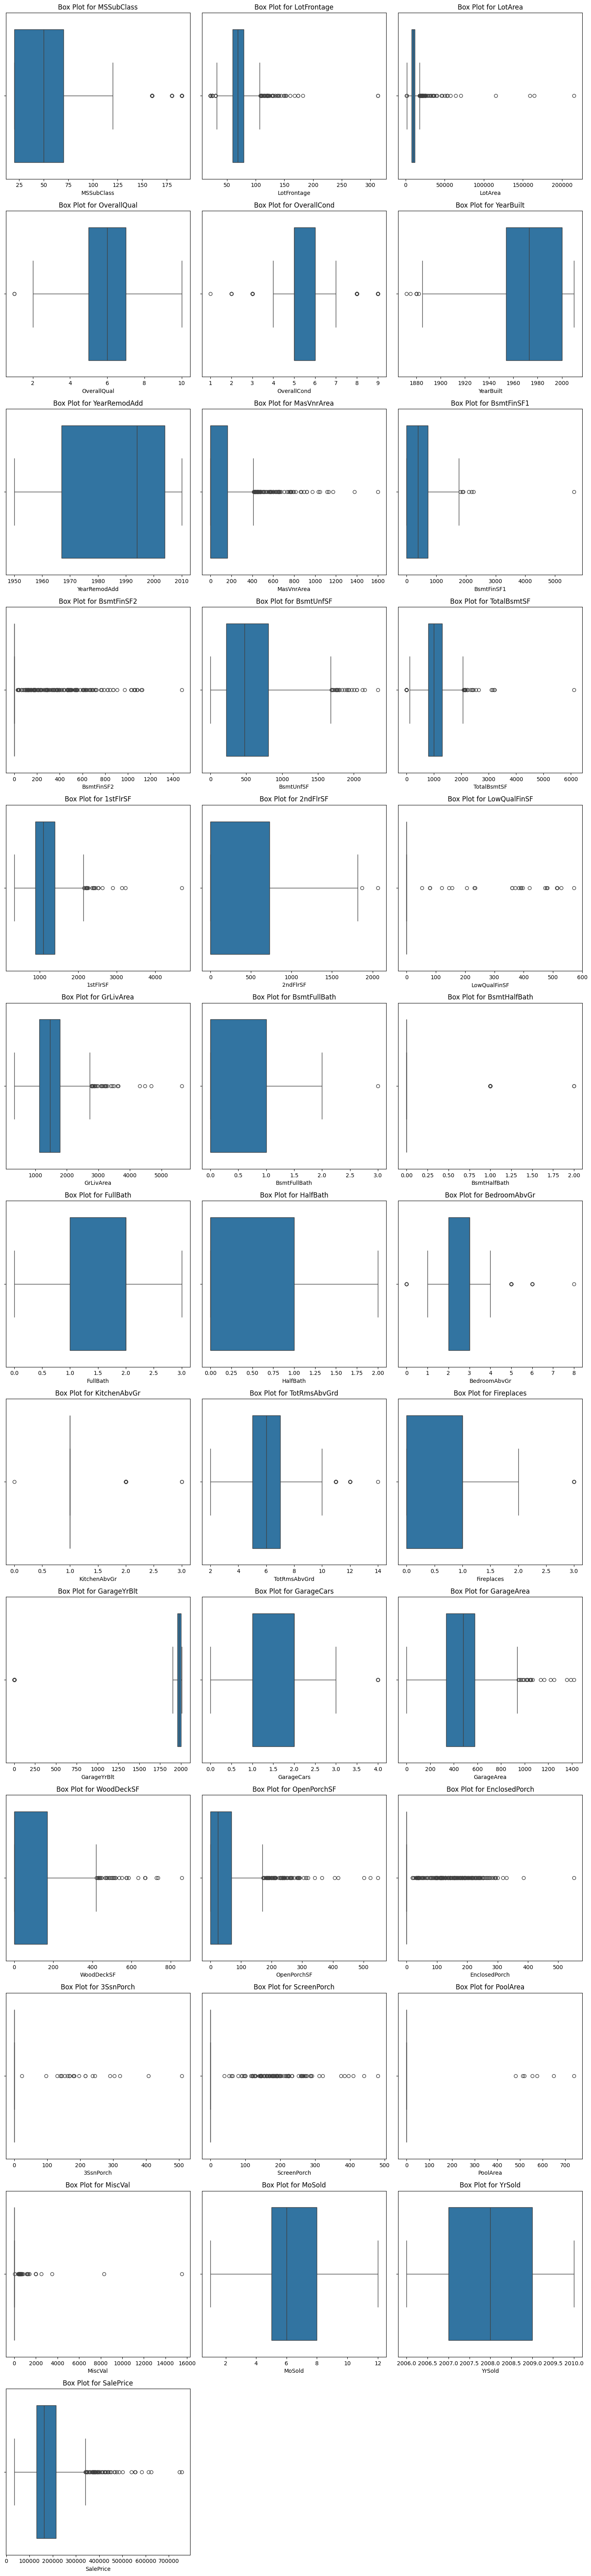

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of numeric columns
num_cols = len(df.select_dtypes(include='number').columns)

# Create a grid layout for the box plots
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each numeric column and create a box plot
for idx, col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot for {col}')

# Remove any extra subplots (if columns are fewer than 3 * rows)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Outliers Removal

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        # Remove rows with outliers
        df = df[~outliers]
        print(f"Removed {outlier_count} outliers in '{col}'.")
    else:
        print(f"No outliers found in '{col}'.")



Removed 103 outliers in 'MSSubClass'.
Removed 47 outliers in 'LotFrontage'.
Removed 59 outliers in 'LotArea'.
Removed 2 outliers in 'OverallQual'.
Removed 106 outliers in 'OverallCond'.
Removed 5 outliers in 'YearBuilt'.
No outliers found in 'YearRemodAdd'.
Removed 64 outliers in 'MasVnrArea'.
No outliers found in 'BsmtFinSF1'.
Removed 121 outliers in 'BsmtFinSF2'.
Removed 16 outliers in 'BsmtUnfSF'.
Removed 36 outliers in 'TotalBsmtSF'.
Removed 4 outliers in '1stFlrSF'.
No outliers found in '2ndFlrSF'.
Removed 12 outliers in 'LowQualFinSF'.
Removed 16 outliers in 'GrLivArea'.
Removed 1 outliers in 'BsmtFullBath'.
Removed 33 outliers in 'BsmtHalfBath'.
No outliers found in 'FullBath'.
No outliers found in 'HalfBath'.
Removed 9 outliers in 'BedroomAbvGr'.
Removed 18 outliers in 'KitchenAbvGr'.
Removed 2 outliers in 'TotRmsAbvGrd'.
Removed 2 outliers in 'Fireplaces'.
Removed 35 outliers in 'GarageYrBlt'.
Removed 1 outliers in 'GarageCars'.
Removed 17 outliers in 'GarageArea'.
Removed 11 

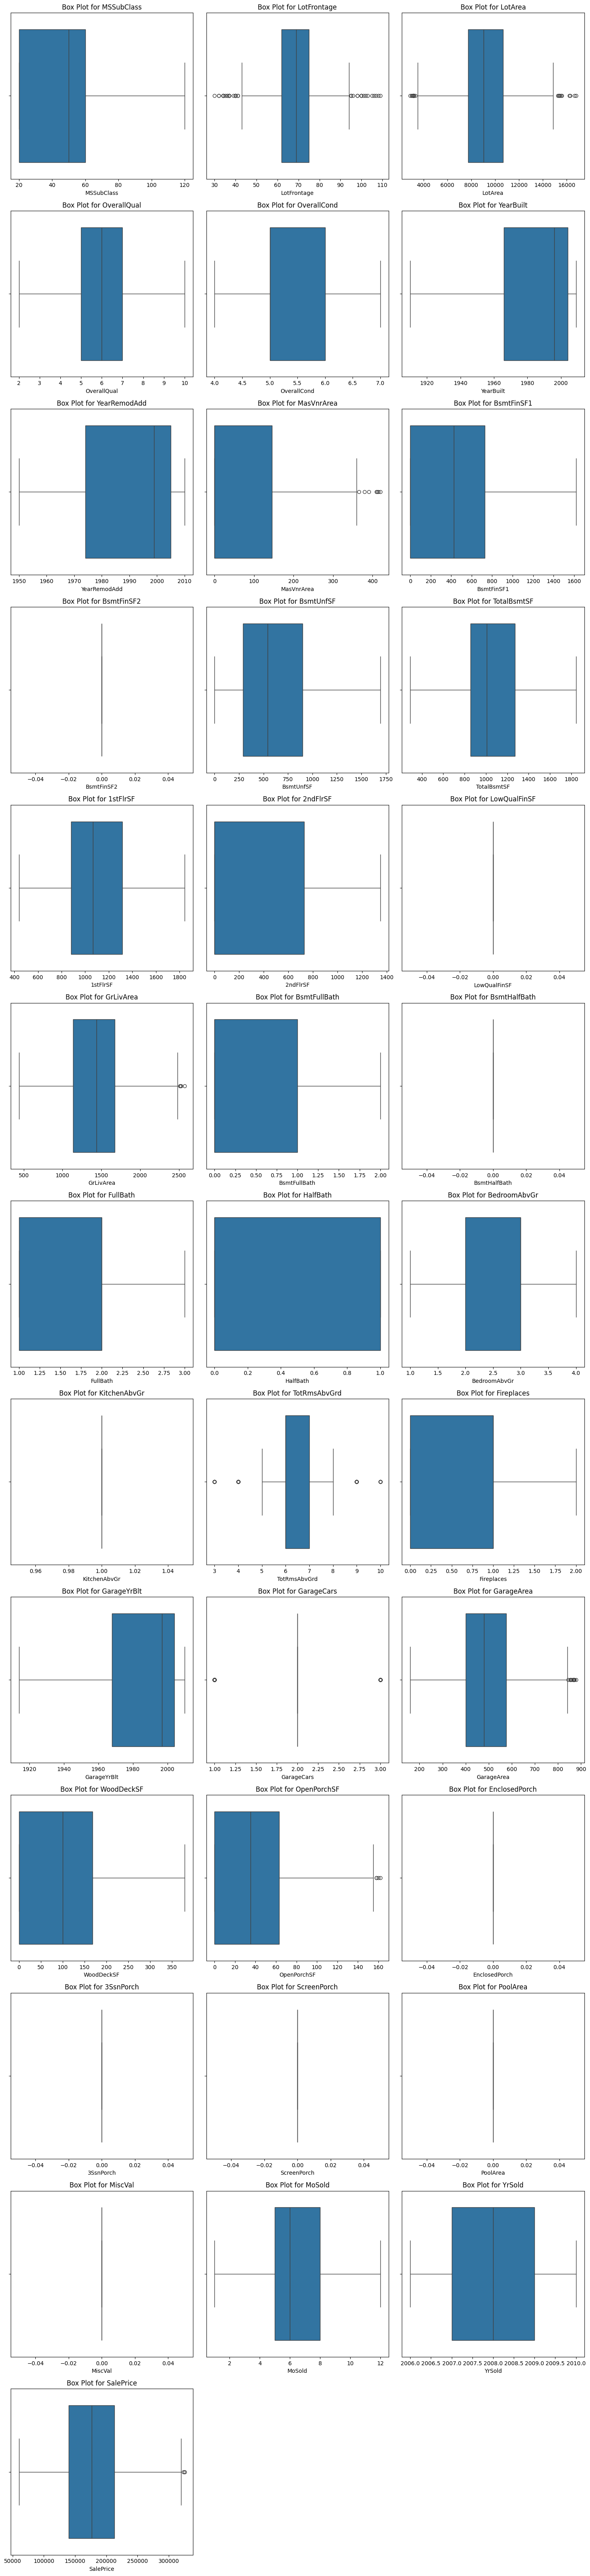

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of numeric columns
num_cols = len(df.select_dtypes(include='number').columns)

# Create a grid layout for the box plots
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each numeric column and create a box plot
for idx, col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot for {col}')

# Remove any extra subplots (if columns are fewer than 3 * rows)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical Features:", (cat_cols),len(cat_cols))
print("Numerical Features:", (num_cols),len(num_cols))

Categorical Features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 39
Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Encl

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [20]:
# splitting data into x and y
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [21]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# scaling data
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# model training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# model evaluation
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R2 = r2_score(y_test, y_pred)
print("R2 Score:", R2)


Mean Squared Error: 327853301.2895769
Mean Absolute Error: 13512.45858974359
R2 Score: 0.8761377023354181


In [26]:
# XgBoost model
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
RS = r2_score(y_test, y_pred)
print("R2 Score:", RS)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 384391744.0
R2 Score: 0.8547775745391846
Mean Absolute Error: 13966.365234375
